# Unsupervised Learning using KMeans Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [64]:
X, y = make_classification(n_samples=2000, n_features=4, n_classes=3, n_clusters_per_class=1, 
                           random_state=42)

In [65]:
df = pd.DataFrame(X, columns=["A", "B", "C", "D"])
df['target'] = y
df

,A,B,C,D,target
0,-2.176022,-1.033766,2.693722,-1.328402,2
1,-0.822467,0.408471,0.409486,-0.379324,0
2,-2.393565,-0.049978,2.135081,-1.294205,2
3,-1.641115,-0.759815,2.016452,-0.998810,2
4,-0.642118,-1.004537,1.327598,-0.499447,2
...,...,...,...,...,...
1995,1.156366,1.205330,-1.931054,0.806698,1
1996,-1.475182,-0.690548,1.818324,-0.898981,2
1997,0.535050,0.777776,-1.061098,0.407065,1
1998,1.282507,1.303423,-2.116273,0.889567,1


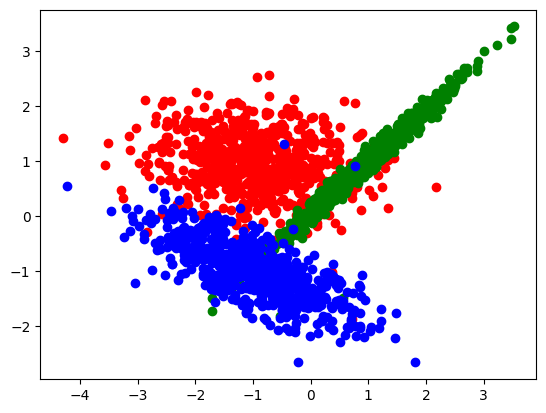

In [66]:
plt.scatter(df['A'][df['target']==0], df['B'][df['target']==0], color="red")
plt.scatter(df['A'][df['target']==1], df['B'][df['target']==1], color="green")
plt.scatter(df['A'][df['target']==2], df['B'][df['target']==2], color="blue")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

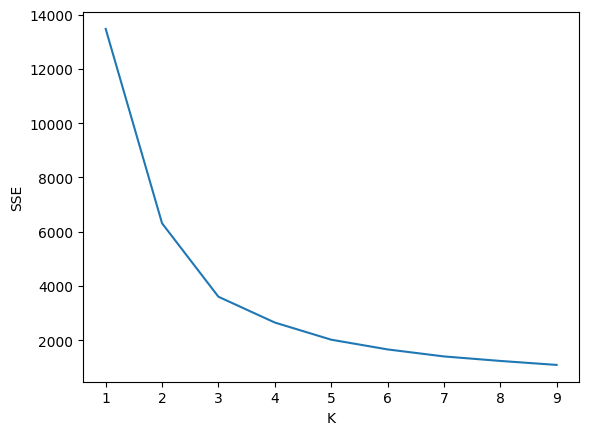

In [67]:
k_range = range(1, 10)
sse = []

# We are just itering from 1 to 9
for k in k_range:
    # Each iteration create a new model with n_cluster as k
    km = KMeans(n_clusters=k)
    km.fit(df)
    # To get SSE use 'inertia_' then will just append it to the sse array
    sse.append(km.inertia_)
sse

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

In [68]:
km = KMeans(n_clusters=3)
predict = km.fit_predict(df)
predict

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, ..., 1, 1, 2])

In [69]:
np.sum(df['target'] == predict)

1752

In [70]:
km.cluster_centers_

array([[-0.8945523 ,  0.80305734,  0.17213181, -0.3574544 ,  0.1997319 ],
       [ 1.23594435,  1.26025942, -2.0426067 ,  0.85790881,  0.88413547],
       [-0.99615885, -0.98949959,  1.62632392, -0.68743248,  1.94372294]])

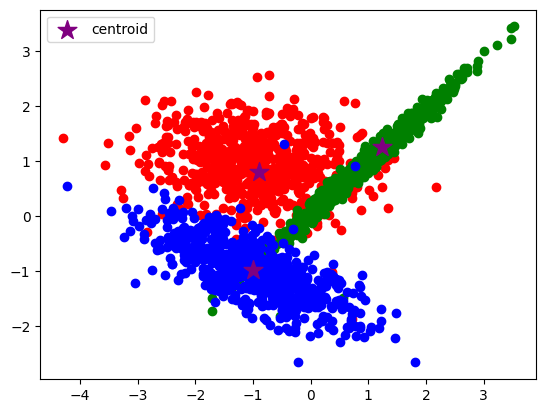

In [71]:
# Plotting the results
plt.scatter(df['A'][df['target']==0], df['B'][df['target']==0], color="red")
plt.scatter(df['A'][df['target']==1], df['B'][df['target']==1], color="green")
plt.scatter(df['A'][df['target']==2], df['B'][df['target']==2], color="blue")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], marker="*", color="purple", 
           label='centroid', s=200)
# plt.scatter(c2[0], c2[1], marker="*", color="blue", s=200, label='Centroid 2')
plt.legend()
plt.show()

In [72]:
np.sum(df['target'] != predict)

248